In [1]:
import pandas as pd

In [2]:
charge = pd.read_csv('B0005_10_charge.csv')
discharge = pd.read_csv('B0005_10_discharge.csv')
imp = pd.read_csv('B0005_10_impedance.csv')

In [3]:
charge['dateTime'] = pd.to_datetime(charge['dateTime'])
discharge['dateTime'] = pd.to_datetime(discharge['dateTime'])

In [4]:
print(charge.head(20))
charge.describe()

     Batt_name  cycle            dateTime  amb_temp  voltage_battery  \
0   'B0005_10'     41 2008-04-02 13:08:17        24         3.873017   
1   'B0005_10'     41 2008-04-02 13:08:17        24         3.479394   
2   'B0005_10'     41 2008-04-02 13:08:17        24         4.000588   
3   'B0005_10'     41 2008-04-02 13:08:17        24         4.012395   
4   'B0005_10'     41 2008-04-02 13:08:17        24         4.019708   
5   'B0005_10'     41 2008-04-02 13:08:17        24         4.025409   
6   'B0005_10'     41 2008-04-02 13:08:17        24         4.030636   
7   'B0005_10'     41 2008-04-02 13:08:17        24         4.035349   
8   'B0005_10'     41 2008-04-02 13:08:17        24         4.039716   
9   'B0005_10'     41 2008-04-02 13:08:17        24         4.043541   
10  'B0005_10'     41 2008-04-02 13:08:17        24         4.046724   
11  'B0005_10'     41 2008-04-02 13:08:17        24         4.050321   
12  'B0005_10'     41 2008-04-02 13:08:17        24         4.05

,cycle,amb_temp,voltage_battery,current_battery,temp_battery,current_load,voltage_load,time
count,541173.000000,541173.0,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000
mean,361.097856,24.0,4.158644,0.571543,25.770628,4.184427,0.566810,5062.836059
std,146.196723,0.0,0.098078,0.620454,1.643729,1.112792,0.616015,3114.798871
min,41.000000,24.0,0.003365,-4.479660,23.246728,0.003000,-4.468000,0.000000
25%,234.000000,24.0,4.195473,0.058024,24.438659,4.250000,0.057000,2271.610000
50%,362.000000,24.0,4.205310,0.227544,25.255235,4.332000,0.225000,4982.078000
75%,486.000000,24.0,4.205978,1.506508,26.819807,4.688000,1.498000,7763.219000
max,616.000000,24.0,8.393141,1.531301,31.187718,5.002000,1.500000,10807.328000


In [5]:
discharge.describe()

,cycle,amb_temp,voltage_battery,current_battery,temp_battery,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,370.643810,24.0,3.515268,-1.806032,32.816991,2.308406,1.362700,1546.208924
std,142.356517,0.0,0.231778,0.610502,3.987515,0.800300,1.313698,906.640295
min,41.000000,24.0,2.455679,-2.029098,23.214802,0.000000,-1.998400,0.000000
25%,256.000000,24.0,3.399384,-2.013415,30.019392,2.388000,1.998000,768.563000
50%,371.000000,24.0,3.511664,-2.012312,32.828944,2.533000,1.998200,1537.031000
75%,490.000000,24.0,3.660903,-2.011052,35.920887,2.690000,1.998200,2305.984000
max,614.000000,24.0,4.222920,0.007496,41.450232,4.238000,1.998400,3690.234000


Text(0.5, 1.0, 'Discharge')

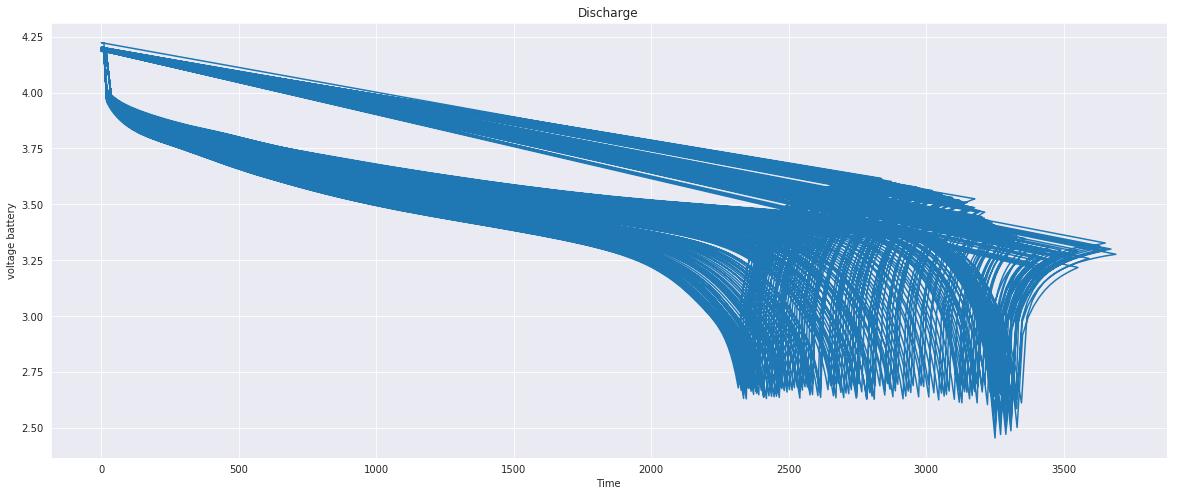

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = discharge.loc[(discharge['dateTime'] >=pd.to_datetime('2008-04-02 13:08:17'))
                        &(discharge['cycle']>=1),['time','voltage_battery']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['time'], plot_df['voltage_battery'])
plt.ylabel('voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Time')
plt.title('Discharge')

Text(0.5, 1.0, 'imp')

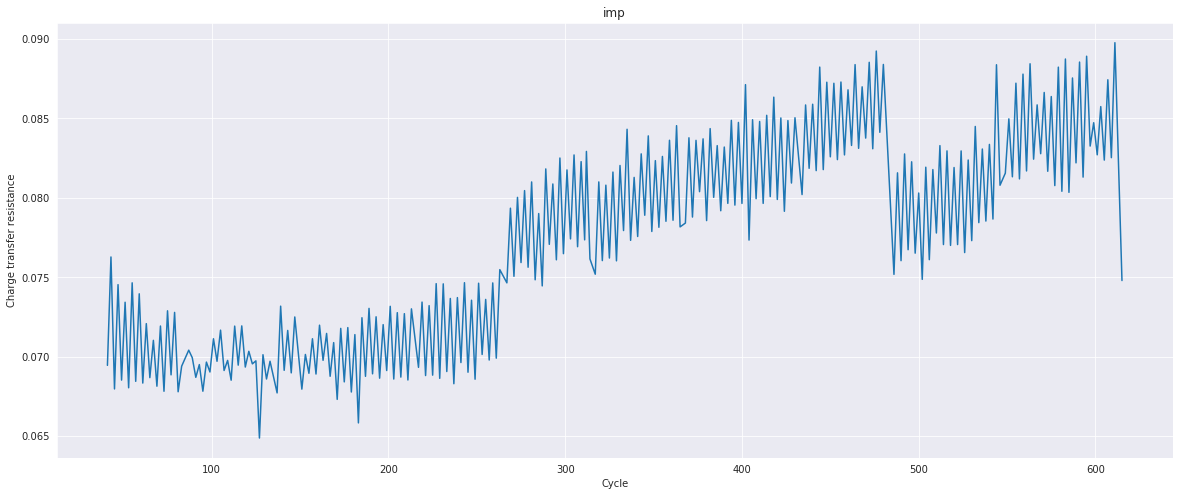

In [10]:
plot_df = imp.loc[(imp['cycle']>=1),['cycle','rct']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['rct'])
plt.ylabel('Charge transfer resistance')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('imp')



Text(0.5, 1.0, 'imp')

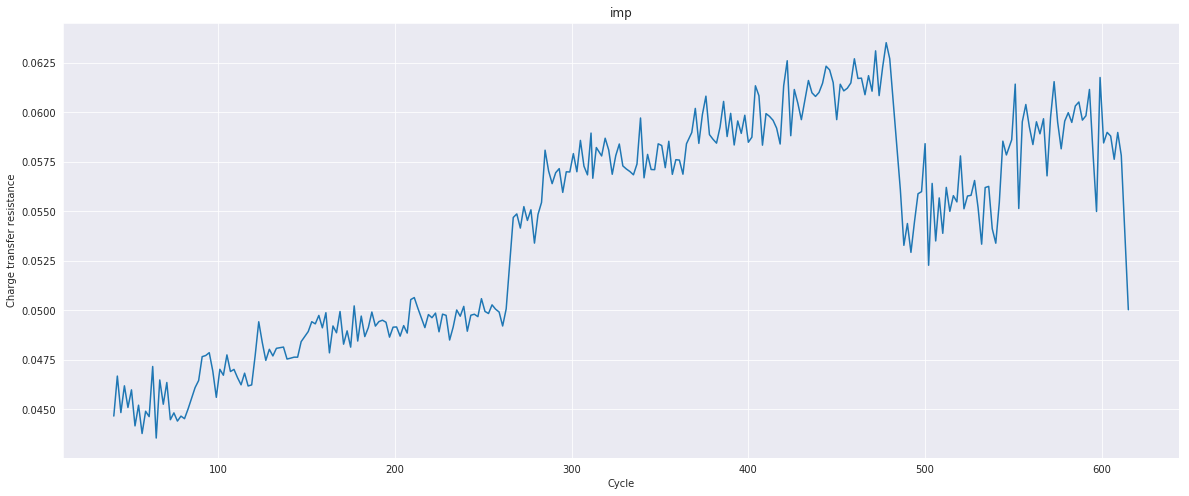

In [11]:
plot_df = imp.loc[(imp['cycle']>=1),['cycle','re']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['re'])
plt.ylabel('Charge transfer resistance')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('imp')